In [1]:
from learningAgent import LearningAlgorithm
from environment import Model
from Qtable import QTable
from test import Test
import numpy as np
import os

In [2]:
np.random.seed(10)

In [3]:
total_Demand = 400
agent_Cost = 57
adv_Cost = 71
total_Stages = 25
num_Actions = 50
num_States = abs(adv_Cost - agent_Cost) + 2 * num_Actions + 1
Qtable = QTable(num_States, num_Actions, learning_Rate = [4900000,5000000])
adversary = Qtable.myopicReset()
init_State = [total_Demand/2, total_Demand/2]

game = Model(total_Demand, [agent_Cost,adv_Cost], total_Stages, init_State, adversary)

In [4]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+demoninator)
Qtable = QTable(num_States, num_Actions, learning_Rate = [4900000,5000000])

In [5]:
numberEpisodes = 10_000_000
discountFactor = 0.99

In [6]:
algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)

In [7]:
algorithm.solver()

In [8]:
# print(Qtable.Q_table)

In [9]:
result = Test(game, Qtable, discountFactor, adversary)

In [10]:
# Returns the optimal payoff and actions according to the Qtable
payoff, actions = result.totalPayoff()
print(payoff)
print(actions)

156721.63152210606
[ 85  95 100 104 106 107 106 108 108 108 108 108 108 108 108 108 108 108
 108 108 108 108 108 108 108]


In [11]:
# The percentage error of the Qtable
error = result.error()

In [12]:
error.mean()

6.518340237578261e-09

In [13]:
Qtable.save(f"round_1_with_cost_{agent_Cost}")

In [14]:
num_rounds = 100
payoffs = [0]*num_rounds
actions = np.zeros((num_rounds, total_Stages))
for i in range(num_rounds):
    
    adversary = Qtable.Q_table
    # Swap over players
    game = Model(total_Demand, [adv_Cost,agent_Cost], total_Stages, init_State, adversary)
    Qtable = QTable(num_States, num_Actions, learning_Rate = [4900000,5000000])
    algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)
    algorithm.solver()
    round = i+1
    Qtable.save(f"round_{round}_with_cost_{adv_Cost}")

    adversary = Qtable.Q_table
    # Swap back over
    game = Model(total_Demand, [agent_Cost,adv_Cost], total_Stages, init_State, adversary)
    Qtable = QTable(num_States, num_Actions, learning_Rate = [4900000,5000000])
    algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)
    algorithm.solver()
    result = Test(game, Qtable, discountFactor, adversary)
    payoff, prices = result.totalPayoff()
    payoffs[i] = payoff
    print(payoff)
    for stage in range(total_Stages):
        actions[i][stage] = prices[stage]
    round = i+2
    Qtable.save(f"round_{round}_with_cost_{agent_Cost}")

110258.78904553386
116640.93660597151
123765.78297511289
132419.5334349324
118895.01299519878
114074.40311244366
128890.11251690678
130223.1057102801
133140.7482414045
116465.83912746499
125063.2006751129
125940.23067511289
125957.97927654626
107272.61069141378
121311.53567749058
113063.16759725903
107458.02632269276
109723.43214403171
118912.159127465
94472.45361610936
96614.7020580578
123660.69922068373
113594.5605369414
133117.6149365891
133121.57493658908
127847.4176639798
116502.51310882121
129115.41814818578
129155.19814818578
109324.66751563683
114853.33971394581
131905.3337538852
123816.51095539633
118572.5288369414
122851.95752179525
103048.15069503624
113477.0171906411
122691.7971424863
113683.66538534917
107785.76389441808
122808.75559409145
105134.93273232372
96306.0441958089
107120.3732147185
143027.0485064772
112219.44224087294
122838.25520234526
116886.20952446072
126461.93717330166
101169.65758887315
123960.36295481244
101252.44419037527
108607.11991306185
108607.119913

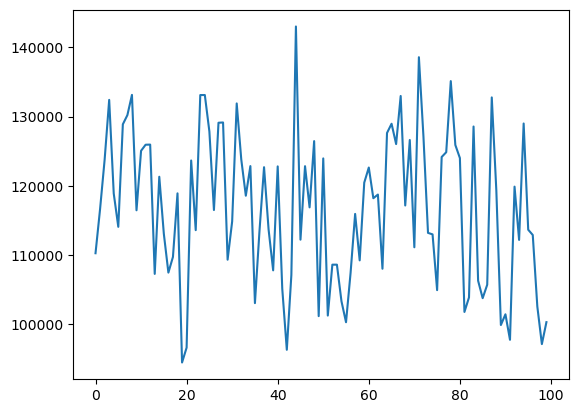

In [15]:
import matplotlib.pyplot as plt
plt.plot(payoffs)
plt.show()